In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("bodyPerformancee.csv")
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [3]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [5]:
df['class'].value_counts()

class
C    3349
D    3349
A    3348
B    3347
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()
class_encoder = LabelEncoder()

In [7]:
df['gender'] = gender_encoder.fit_transform(df['gender'])
df['class_x'] = class_encoder.fit_transform(df['class'])
df 
#numerik olmayan değerler için encoding işlemi

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_x
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,1,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2
13389,21.0,1,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3
13390,39.0,1,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0
13391,64.0,0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3


In [8]:
X = df.drop(['class','class_x'], axis=1) 
y = df.class_x

In [9]:
X  #girdiler

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0
...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,1,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0
13389,21.0,1,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0
13390,39.0,1,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0
13391,64.0,0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0


In [10]:
y #çıktı

0        2
1        0
2        2
3        1
4        1
        ..
13388    2
13389    3
13390    0
13391    3
13392    2
Name: class_x, Length: 13393, dtype: int32

In [11]:
from sklearn.model_selection import train_test_split   

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X , y , train_size=0.8) #test ve eğitim verisi oluşturma


In [13]:
X_train

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
1257,48.0,0,161.4,51.9,19.0,82.0,130.0,23.9,26.2,22.0,163.0
3861,36.0,1,176.7,88.0,28.6,83.0,131.0,44.5,11.1,52.0,166.0
3738,24.0,0,171.5,61.7,32.5,88.0,146.0,25.3,-2.2,18.0,149.0
296,63.0,1,160.5,68.2,28.7,84.0,193.0,37.1,14.3,31.0,174.0
2943,25.0,1,174.4,65.3,16.3,76.0,130.0,42.0,23.1,46.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...
4931,21.0,0,156.2,52.3,25.7,65.0,129.0,26.6,19.3,46.0,208.0
3770,56.0,1,171.0,76.5,25.7,85.0,139.0,39.4,10.5,45.0,179.0
1493,35.0,0,160.7,58.4,31.5,66.0,120.0,24.1,20.4,27.0,150.0
6731,27.0,0,166.2,78.5,36.3,85.0,119.0,32.7,22.4,43.0,166.0


In [14]:
from sklearn.tree import DecisionTreeClassifier          #deneme amaçlı karar ağacı
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("Decision Tree Classifier Accuracy :",model.score(X_test,y_test))


Decision Tree Classifier Accuracy : 0.637551325121314


In [15]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5) # n_splits parametresi ile veri setini kaç farklı şekilde ayıracağımızı belirleriz.
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [16]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)    #soldaki küme eğitim verisini içerir sağ taraf ise test verisini içerir

[2 3 4 5 6 7 8] [0 1]
[0 1 4 5 6 7 8] [2 3]
[0 1 2 3 6 7 8] [4 5]
[0 1 2 3 4 5 8] [6 7]
[0 1 2 3 4 5 6 7] [8]


In [17]:
from sklearn.ensemble import RandomForestClassifier   # sınıflandırma için kütüphane ekleme
model_x = RandomForestClassifier(n_estimators=120,
                                 max_depth=12,        # Örnek değerler, deneme yanılma ile ayarlanmalı
                                      
)
model_x.fit(X_train, y_train)           #model eğitildi

RandomForestClassifier(max_depth=12, n_estimators=120)

In [18]:
model_x.score(X_test,y_test)

0.7390817469204927

In [19]:
feature_importances = model.feature_importances_
results_and_values = list(zip(feature_importances, ["age", "gender", "height_cm", "weight_kg", "body fat_%", "diastolic", "systolic", "gripForce", "sit and bend forward_cm", "sit-ups counts", "broad jump_cm"]))

for result, value in results_and_values:
    print(f"{value}: {result:.5f}")           #özelliklerin ağırlıkları

age: 0.09767
gender: 0.01430
height_cm: 0.05114
weight_kg: 0.08874
body fat_%: 0.09924
diastolic: 0.04223
systolic: 0.04048
gripForce: 0.07570
sit and bend forward_cm: 0.26156
sit-ups counts: 0.16831
broad jump_cm: 0.06064


In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
cross_val_score(RandomForestClassifier(n_estimators=40,max_depth=12,),X,y,cv=kf)

array([0.71257932, 0.72937663, 0.72937663, 0.71657954, 0.7356236 ])

In [22]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=50),X,y,cv=3)
np.average(scores1)

0.7292617912316826

In [23]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=60),X,y,cv=4)
np.average(scores2)

0.7282915012701949

In [24]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=100),X,y,cv=5)
np.average(scores3)

0.7335916977704777

In [25]:
y_predicted = model_x.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
cm =confusion_matrix(y_test, y_predicted)
cm

array([[584, 116,   9,   3],
       [146, 399,  82,  17],
       [ 46, 109, 450,  25],
       [  7,  38, 101, 547]], dtype=int64)

In [28]:
import seaborn as sn
import matplotlib.pyplot as plt

Text(95.72222222222221, 0.5, 'gerçek değer')

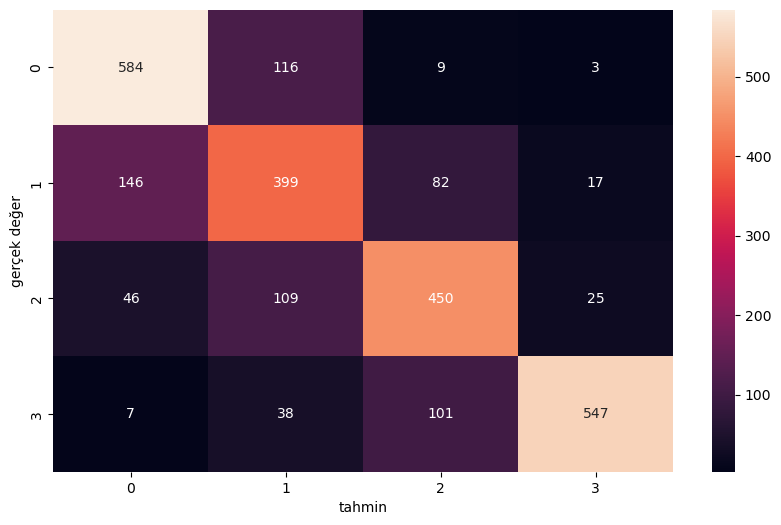

In [29]:
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel('tahmin')
plt.ylabel('gerçek değer')

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

#precision bir sınıfa ait olarak tahmin edilen örnekler arasında gerçekten o sınıfa ait olanların oranını ifade eder
#recall gerçekten o sınıfa ait olan örneklerin ne kadarının doğru bir şekilde tahmin edildiğini ifade eder.
#f1-score harmonik ortalama

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       712
           1       0.60      0.62      0.61       644
           2       0.70      0.71      0.71       630
           3       0.92      0.79      0.85       693

    accuracy                           0.74      2679
   macro avg       0.74      0.74      0.74      2679
weighted avg       0.75      0.74      0.74      2679



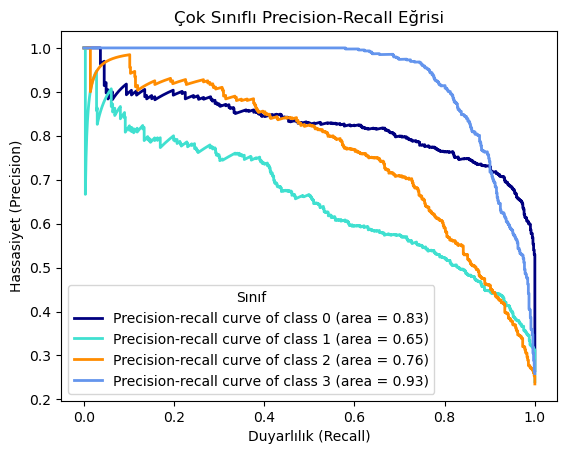

In [31]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from itertools import cycle


y_scores_proba = model_x.predict_proba(X_test) # Tahmin olasılıklarını alın

# Etiketleri binarize et
num_classes = len(np.unique(y_test)) 
classes = list(range(num_classes))
y_test_bin = label_binarize(y_test, classes=classes)

# Precision-recall eğrilerini hesapla
precision = dict()
recall = dict()
average_precision = dict()
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_scores_proba[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_scores_proba[:, i])

# Her sınıfın precision-recall eğrisini çiz
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
for i, color in zip(range(num_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label='Precision-recall curve of class {0} (area = {1:0.2f})'
             ''.format(i, average_precision[i]))

plt.xlabel('Duyarlılık (Recall)')
plt.ylabel('Hassasiyet (Precision)')
plt.title('Çok Sınıflı Precision-Recall Eğrisi')
plt.legend(loc="best", title='Sınıf')
